# Sample code for exercise 3-1
2017 Aug. Tsuyoshi Okubo  
2018 Dec. modified by TO   
2020 Dec. modified by TO

In this code, you can perform TEBD simulation of the ground state of spin model on 1d chain.  
$$\mathcal{H} = \sum_{i} J_z S_{i,z}S_{i+1,z} + J_{xy} (S_{i,x}S_{i+1,x} + S_{i,y}S_{i+1,y}) - h_x \sum_i S_{i,x} + D\sum_i S_{i,z}^2$$

This Hamiltonian can represent several situations. For example, when we set parameters,
* $J_z = -1$, $J_{xy} = 0$, $h_x \neq 0$, and $m = 2$ 

It represents the transverse field Ising chain (with the open boundary condition).
If you set
* $J_z = J_{xy} = 1$, $h_x = 0$ 

It represents the $S=(m-1)/2$ Heisenberg model (with the open boundary condition).

Note that, the accuracy of the calculation depends on chi_max, tau, and iteration steps.
tau is gradually decreases from tau_max to tau_min.


You can change   

- N: # of sites
- m: size of spin  (2S = 2m + 1)  
- Jz: amplitude of SzSz interaction  
- Jxy: amplitude of SxSx + SySy interaction  
- hx : amplitude of external field alogn x direction  
- D : Single ion anisotropy  
- (periodic: In this exercize, we only consider open boundary)
- chi_max : maximum bond dimension of MPS
- tau_max : maximum value of tau
- tau_min : minimum value of tau
- T_step : Total ITE steps
- output_dyn_num : output data step
- Perform_ED :flag to calculate exact ground state energy

In [1]:
import numpy as np
import scipy.linalg as linalg
import ED
import TEBD
from matplotlib import pyplot

In [2]:
N=10          ## Chain length 
m = 3         ## m = 2S + 1, e.g. m=3 for S=1 
Jz = 1.0      ## Jz for SzSz interaction
Jxy = 1.0     ## Jxy for SxSx + SySy interaction
hx = 0.0      ## external field along x direction
D = 0.0       ## single ion anisotropy
#periodic = False ## in this exersize , we only consider open boundary



chi_max = 20  ## maxmum bond dimension at truncation

tau_max = 0.1     ## start imaginary time tau
tau_min = 0.001   ## final imaginary time tau
T_step=2000       ## ITE steps
output_dyn_num = 100 ## output steps


## flag to calculate exact ground state enegy
## Note that for larger N, it is impossible to calculate exact energy
## In that casese, please set this flag False
Perform_ED = True

In [3]:
print("2S = m - 1, N-site spin chain")
print("N = "+repr(N))
print("m = "+repr(m))
print("Hamiltonian parameters:")
print("Jz = "+repr(Jz))
print("Jxy = "+repr(Jxy))
print("hx = "+repr(hx))
print("D = "+repr(D))

print("chi_max = "+repr(chi_max))

print("tau_max = "+repr(tau_max))
print("tau_min = "+repr(tau_min))
print("T_step = "+repr(T_step))
print("output_dyn_num = "+repr(output_dyn_num))
print("Perform_ED = "+repr(Perform_ED))

2S = m - 1, N-site spin chain
N = 10
m = 3
Hamiltonian parameters:
Jz = 1.0
Jxy = 1.0
hx = 0.0
D = 0.0
chi_max = 20
tau_max = 0.1
tau_min = 0.001
T_step = 2000
output_dyn_num = 100


In [4]:

if Perform_ED:
    ## Obtain the smallest eigenvalue
    eig_val,eig_vec = ED.Calc_GS(m,Jz, Jxy,hx,D,N,k=1)
    Eg = eig_val[0]/(N-1)

In [5]:
##TEBD simulation
Tn, lam,T_list,E_list,mz_list = TEBD.TEBD_Simulation(m,Jz,Jxy,hx,D,N,chi_max,tau_max,tau_min,T_step,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -1.0 1.0 array([ 1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.])
##Dyn 1.956898387873087 -1.4196055658998779 0.5747141796709827 array([ 0.68918994, -0.49893281,  0.57697668, -0.53854267,  0.55193742,
       -0.55193742,  0.53854267, -0.57697668,  0.49893281, -0.68918994])
##Dyn 3.8257218398891855 -1.4254288024722603 0.4494111471265883 array([ 0.58668642, -0.38508595,  0.45137372, -0.39014844,  0.4017533 ,
       -0.4017533 ,  0.39014844, -0.45137372,  0.38508595, -0.58668642])
##Dyn 5.610434381147543 -1.4272721074350694 0.38855325137031405 array([ 0.51715429, -0.332658  ,  0.38995726, -0.33031044,  0.33998028,
       -0.33998028,  0.33031044, -0.38995726,  0.332658  , -0.51715429])
##Dyn 7.314821626228748 -1.4285849821879164 0.33481880517818363 array([ 0.44702691, -0.28669146,  0.33611594, -0.28352116,  0.2917791 ,
       -0.29177913,  0.28352107, -0.3361159 ,  0.28669141, -0.44702678])
##Dyn 8.942498808990797 -1.4295395413263174 0.2838846590352341 array([ 0.37897111, -0.24

##Dyn 36.89858368585276 -1.4326617485753859 0.006832454889524116 array([ 0.00898972, -0.00586711,  0.0069351 , -0.00582399,  0.00601331,
       -0.00601331,  0.00582399, -0.0069351 ,  0.00586711, -0.00898972])
##Dyn 37.19477224255396 -1.4326666475253 0.006564906503313101 array([ 0.00863698, -0.00563725,  0.00666443, -0.0055957 ,  0.00577818,
       -0.00577818,  0.0055957 , -0.00666443,  0.00563725, -0.00863698])
##Dyn 37.47763011826798 -1.432671123887608 0.006319434255087319 array([ 0.00831342, -0.00542635,  0.00641608, -0.00538622,  0.00556243,
       -0.00556243,  0.00538622, -0.00641608,  0.00542635, -0.00831342])
##Dyn 37.74775729247265 -1.4326752148065784 0.0060938104673669575 array([ 0.00801607, -0.0052325 ,  0.00618778, -0.00519365,  0.0053641 ,
       -0.0053641 ,  0.00519365, -0.00618778,  0.0052325 , -0.00801607])
##Dyn 38.005726741121045 -1.432678954094265 0.00588607309539049 array([ 0.00774233, -0.00505401,  0.00597757, -0.00501633,  0.00518147,
       -0.00518147,  0.0050

##Dyn 42.43646760204115 -1.4327178206045166 0.003266339696149209 array([ 0.00429498, -0.00280241,  0.00332473, -0.00277818,  0.00287619,
       -0.00287619,  0.00277818, -0.00332473,  0.00280241, -0.00429498])
##Dyn 42.48341032476122 -1.4327179771278535 0.0032462983217696898 array([ 0.00426864, -0.00278518,  0.00330442, -0.00276104,  0.00285854,
       -0.00285854,  0.00276104, -0.00330442,  0.00278518, -0.00426864])
##Dyn 42.528240276926525 -1.4327181216280027 0.0032272802307124755 array([ 0.00424366, -0.00276883,  0.00328514, -0.00274477,  0.00284178,
       -0.00284178,  0.00274477, -0.00328514,  0.00276883, -0.00424366])
##Dyn 42.57105254887609 -1.4327182550844997 0.00320922801324148 array([ 0.00421994, -0.0027533 ,  0.00326685, -0.00272933,  0.00282588,
       -0.00282588,  0.00272933, -0.00326685,  0.0027533 , -0.00421994])
##Dyn 42.61193795117866 -1.4327183783941702 0.0031920879343607716 array([ 0.00419742, -0.00273857,  0.00324948, -0.00271467,  0.00281078,
       -0.00281078, 

In [6]:
## Calculate Energy
Env_left,Env_right = TEBD.Calc_Environment(Tn,lam,canonical=False)
E_mps = TEBD.Calc_Energy(Env_left,Env_right,Tn,lam,Jz,Jxy,hx,D)

if Perform_ED:
    print("Ground state energy per bond = " +repr(Eg))
print("TEBD energy per bond = " + repr(E_mps))

Ground state energy per bond = -1.4327289035789932
TEBD energy per bond = -1.4327194356135526


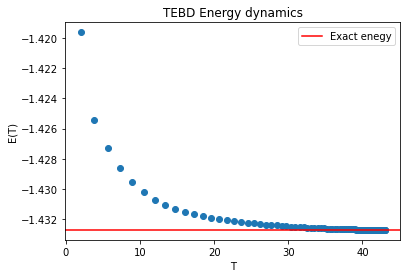

In [8]:
## plot energy dynamics
pyplot.title("TEBD Energy dynamics")
pyplot.plot(T_list[1:],E_list[1:],"o")
pyplot.xlabel("T")
pyplot.ylabel("E(T)")
if Perform_ED:
    pyplot.axhline(y=Eg, color='red', label="Exact enegy")
    pyplot.legend()
pyplot.show()
